# P06 - Spectral Estimation - Free oscillations

In [1]:
# Execute this first!
%matplotlib inline
from pathlib import Path
import matplotlib
matplotlib.rc('font', size=8)  # adjust font size of plot
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rcParams
rcParams["figure.subplot.hspace"] = (0.4)
rcParams["figure.figsize"] = (14, 9)
rcParams["axes.labelsize"] = (15)
rcParams["axes.titlesize"] = (20)
rcParams["font.size"] = (12)

## Exercise 1: Spectral analysis

In this exercise we want to analyse the different parameters that are important in Fourier Analysis. We generate a simple sinusoidal signal in the time domain and analyze its spectral content in the frequency domain applying a
Fourier Transform. Save some of the plots that illustrate the important points and problems that can arise.

Execute the following code and answer the following questions. For most sub questions you want to go back to the original settings before playing around with other parameters.

a) Describe what the Fourier Transform is illustrating in this example.

b) Change the windowing function used in the taper. Can you see a difference using different taper functions? Can you see the main- and side-lobes of the spectral leakage? Now use zero-padding and a logarithmic scaling for the y-Axis in the plot. Again describe the changes you see now using different taper functions.

**Keep some zero padding for the rest of the exercise to be able to see the mentioned effects and keep logarithmic scale on y-axis.**

c) Change the number of wavelengths in the time series `number_of_wavelengths` to different values. Run the program again, describe and explain the effect.

d) Change the sampling rate `sampling_rate` of the time series to different values. Run the program again, describe and explain the effect. Hint: When lowering the sampling rate, use higher `number_of_wavelengths` to have a longer input signal timeseries.

e) Change the percentage of tapering `taper_percentage` to different values. Run the program again, describe and explain the effect.

f) Uncomment the line that adds two more sinusoidal signals with different frequencies to your time series. Describe the changes you see in time domain and frequency domain. Describe the characteristics of the spectral content that you can make out especially when using different windowing functions.

g) Summarize how the different parameters in the Fourier Transform in general (as seen in these exercises) interact in the spectral estimation. What problems can arise? What connections between the different parameters do you have to keep in mind?

h) Add noise to the signal (uncomment the lines where is says so). Explain what you see in time domain and frequency domain.


(0.0, 6.0)

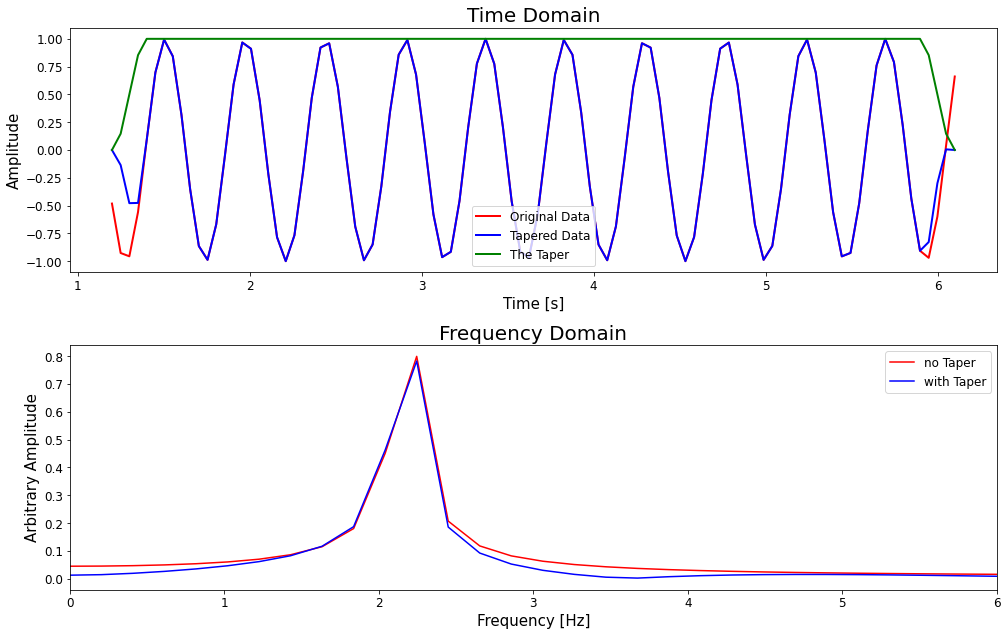

In [2]:
# Code Block 1
# -*- coding: utf-8 -*-
from scipy.signal.windows import get_window
from obspy.signal.invsim import cosine_taper 


# Number of wavelengths in the signal,
# higher values will make a longer input signal
number_of_wavelenghts = 10.6  # original value: 10.6 

# sampling rate
sampling_rate = 20.0  # original value: 20 Hz  (dt: 50 milliseconds)
dt = 1.0 / sampling_rate

# Set generator frequency / frequency of signal (in Hz)
f = 2.15  # original value: 2.15

# secondary generator frequencies
f2 = f * 1.07
f3 = f * 1.5


npts = int(sampling_rate * number_of_wavelenghts / f)

x = np.linspace(0.0, npts * dt, npts) + 1.2  # time of samples in seconds


# Generate sine wave with generator frequency f 
y = np.sin(f * 2.0 * np.pi * x)

# to add more sinusoids to the signal
# uncomment the following line
#y = y + np.sin(f * 1.07 * 2.0 * np.pi * x) + 2e-2 * np.sin(f * 2.0 * 2.0 * np.pi * x)

# to add noise to the signal
# uncomment the following two lines:
#noise_amplitude = 0.8
#y = y + np.random.randn(len(y)) * noise_amplitude

# Percentage of tapering applied to signal, value between 0.0 and 1.0
taper_percentage = 0.1  # original value: 0.1
taper = cosine_taper(npts, taper_percentage)

# switch out the used tapering function here (should be same length as the signal),
# by switching out the `taper` variable with a window function generated from scipy or numpy:
#  - https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.get_window.html
#  - e.g. https://docs.scipy.org/doc/numpy/reference/generated/numpy.hanning.html
# for scipy's get_window() possible options include:
#      boxcar, triang, blackman, hamming, hann, bartlett, flattop
#taper = get_window('hamm', npts)
#taper = get_window('boxcar', npts)
#taper = get_window('hann', npts)

# Taper signal
y_taper = y * taper

# Use next line to use zero-padding,
# e.g. set `zero_padding = 10` to append 10 times the length of the signal
# in zeros before calculating the FT
zero_padding = 1  # original value: 1  (no zero padding)

# Do the Fast Fourier Transformation for Real valued data
#y = np.concatenate((y, np.zeros(npts * zero_padding)))
fy = np.fft.rfft(y, n=npts * zero_padding)
fy_taper = np.fft.rfft(y_taper, n=npts * zero_padding)


# Set up the plots
xf = np.linspace(0.0, 1.0 / (2.0 * dt), (npts * zero_padding // 2) + 1)

plt.subplot(211)
plt.title('Time Domain')
plt.plot(x, y, label="Original Data", color='r', linewidth=2)
plt.plot(x, y_taper, label="Tapered Data", color='b', linewidth=2)
plt.plot(x, taper, label="The Taper", color='g', linewidth=2)
plt.legend(loc='lower center')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(212)
plt.title('Frequency Domain')
plt.plot(xf, 2.0/npts * np.abs(fy), color='r', label="no Taper")
plt.plot(xf, 2.0/npts * np.abs(fy_taper), label="with Taper", color='b')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Arbitrary Amplitude')
plt.tight_layout()

# focus on a part of the frequency spectrum 
# (uncomment the next line and set suitable values)
plt.xlim(0, 6)

# uncomment the next lines to show spectrum in logarithmic scale
# and zoom in appropriately
#plt.ylim(bottom=1e-3)
#plt.gca().set_yscale('log')

## Exercise 2: Display the Earth's Eigenmodes Excited by a Great Earthquake

In this exercise we load a ~43 hours seismogram record of a magnitude 8.0 earthquake in central China (sampled at 1 Hz). Doing a Fourier transform we can study the eigenmodes of the Earth excited by this earthquake. You should control two parameters: The length of the seismogram record used in the Spectral Estimation and the amount of zeros padded before applying the Fourier transform.

Execute the following code and answer the following questions:

a) The plot shows the spectra of the data. The vertical lines in the plot are from analytically computed eigenmodes. Comment on how well the spectra match the analytically calculated eigenmodes. (Comment the last line to view the full frequency range)

b) Change the length of the seismogram record used in the FFT (*hours_used*) and describe the changes in the Spectral Estimation with the length of the seismogram.

c) Reset the `hours_used` to 10 (or even lower) and modify the number of zeros which are padded for the FFT. (Use the parameter `n`). Describe the changes in the Spectral Estimation with the number of zeros padded.

d) Try to get an optimal display of the Eigenmodes by adjusting these two parameters.


GR.FUR..LHE | 2008-05-12T05:15:12.640000Z - 2008-05-13T01:15:12.640000Z | 1.0 Hz, 72001 samples
Length of data record: 72001
Total number of points after zero padding: 72001


(0.002, 0.005)

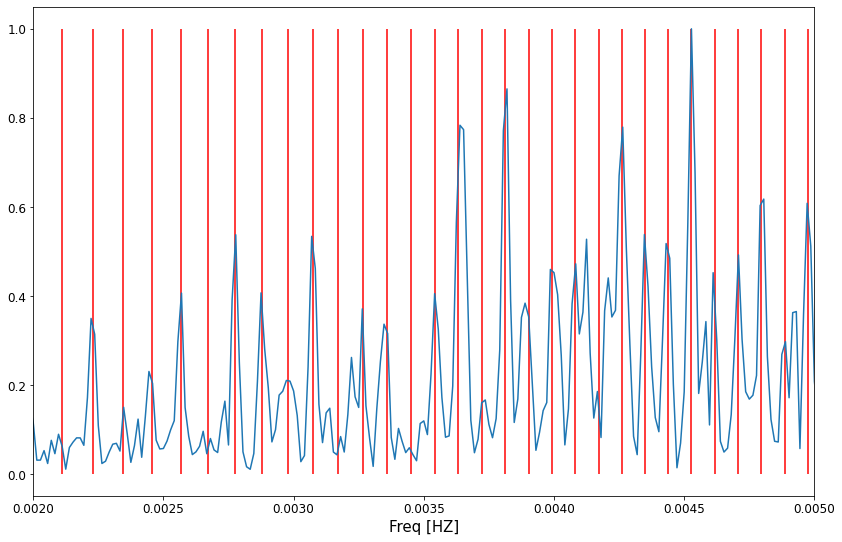

In [3]:
# Code Block 2 
# -*- coding: utf-8 -*-
from obspy import read


# Load data
data_dir = Path('data')
st = read(str(data_dir / "GR.FUR..LHE.D.2008.133"))
st += read(str(data_dir / "GR.FUR..LHE.D.2008.134"))
st.merge()
tr = st[0]

# cut length of seismogram
# maximum length is approximately 43
hours_used = 20  # initial value: 20
t_end = tr.stats.starttime + hours_used * 3600
tr.trim(endtime=t_end)
print(tr)

# preprocessing
df = tr.stats.sampling_rate
npts = tr.stats.npts

tr.detrend('linear')  # detrend
# apply windowing function to ensure the real waveform data 
# starts and ends at zero
tr.data *= np.hanning(npts)

# n: int, optional
# Number of points along transformation axis in the input to use. 
# If n is smaller than the length of the input, the input is cropped. 
# If it is larger, the input is padded with zeros. If n is not given, the 
# length of the input along the axis specified by axis is used.

# define the total length of the record
# original:   n = int(len(tr.data) * 1.0)
#     ..for no zero padding
#  use e.g. 10.0 at the end for padding to 10x length of input record 
n = int(len(tr.data) * 1.0)

print ('Length of data record:', len(tr.data))
print ('Total number of points after zero padding:', n)

# Do the fourier transform
fdat = np.fft.rfft(tr.data, n=n)

# Load the eigenmodes
# eigen = np.loadtxt(os.path.join(pracDir, "eiglst.txt"), 
#                    usecols=[0,1,2,3], converters={1: lambda s: s == "S" and True or False})

# Load the eigenmodes
# (np.loadtxt method to load the eigenmodes has been rewritten, 
# because I had trouble with it reading in strings as bytes in Python 3)
list_e = []
with open(data_dir / "eiglst.txt") as f:
    # skip first 5 lines    
    f.readline()
    f.readline()
    f.readline()
    f.readline()
    f.readline()
    for line in f.readlines():
        a, b, c, d = line.split()[0:4]
        if b == 'S':
            b = 1.
        else:
            b = 0.
        a, b, c = float(a), float(b), float(c)
        list_e.append([a, b, c, d])

        
eigen = np.array(list_e, dtype='float')

# load only the S part
ind1 = eigen[:,1].astype(bool)
ind2 = eigen[:,0]
ind = ((ind2 == 0) & ind1)  # bitwise comparing for bool arrays
modes = eigen[ind,3] / 1000  # normalize, freq given in mHz

# Take the first 2% only
N = len(fdat) * 0.02
N = int(N)
freq = np.linspace(0, df/2, len(fdat))
freq = freq[1:N+1]  # zero frequency is offset
fdat = fdat[1:N+1]
fdat /= abs(fdat).max()  # normalize to 1

# Plot the results

plt.figure()
plt.plot(freq, abs(fdat))
plt.vlines(modes[0:len(modes)//2], 0.001, 1,colors='r')
plt.xlabel('Freq [HZ]')

# use e.g. something like this to zoom in:
plt.xlim(0.002, 0.005)
